# Clustering

In [1]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2025-04-03 02:32:00--  https://bit.ly/fruits_300_data
bit.ly (bit.ly) 해석 중... 67.199.248.11, 67.199.248.10
다음으로 연결 중: bit.ly (bit.ly)|67.199.248.11|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 301 Moved Permanently
위치: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [따라감]
--2025-04-03 02:32:00--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
github.com (github.com) 해석 중... 20.200.245.247
다음으로 연결 중: github.com (github.com)|20.200.245.247|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 302 Found
위치: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [따라감]
--2025-04-03 02:32:01--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
raw.githubusercontent.com (raw.githubusercontent.com) 해석 중... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
다음으로 연결 중: raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... 연결했습니다.
HTTP 요청을 보냈습니다. 응답 기다리는 중... 200 OK
길이: 3000128 (2.9M) [application/o

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits.shape)
print(fruits[0, 0, :])

(300, 100, 100)
[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


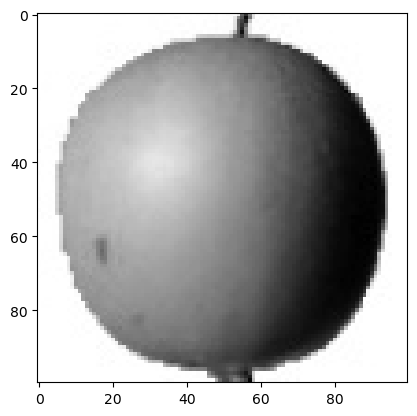

In [3]:
plt.imshow(fruits[0], cmap='gray_r')
plt.show()

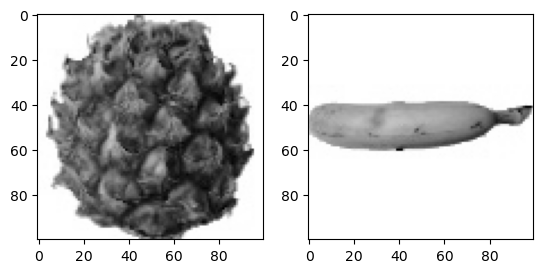

In [4]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

In [5]:
apple = fruits[0:100].reshape(-1, 100*100)
pine = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)
print(apple.shape)

(100, 10000)


In [6]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


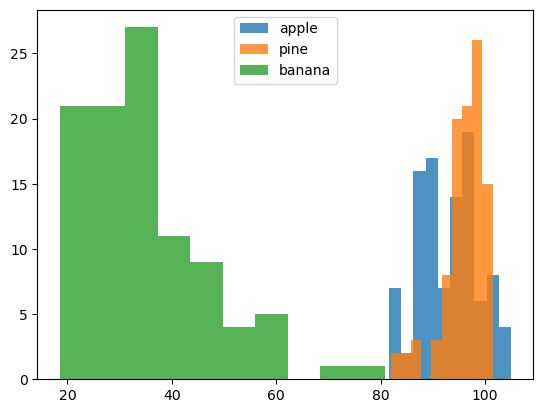

In [7]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pine, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pine', 'banana'])
plt.show()

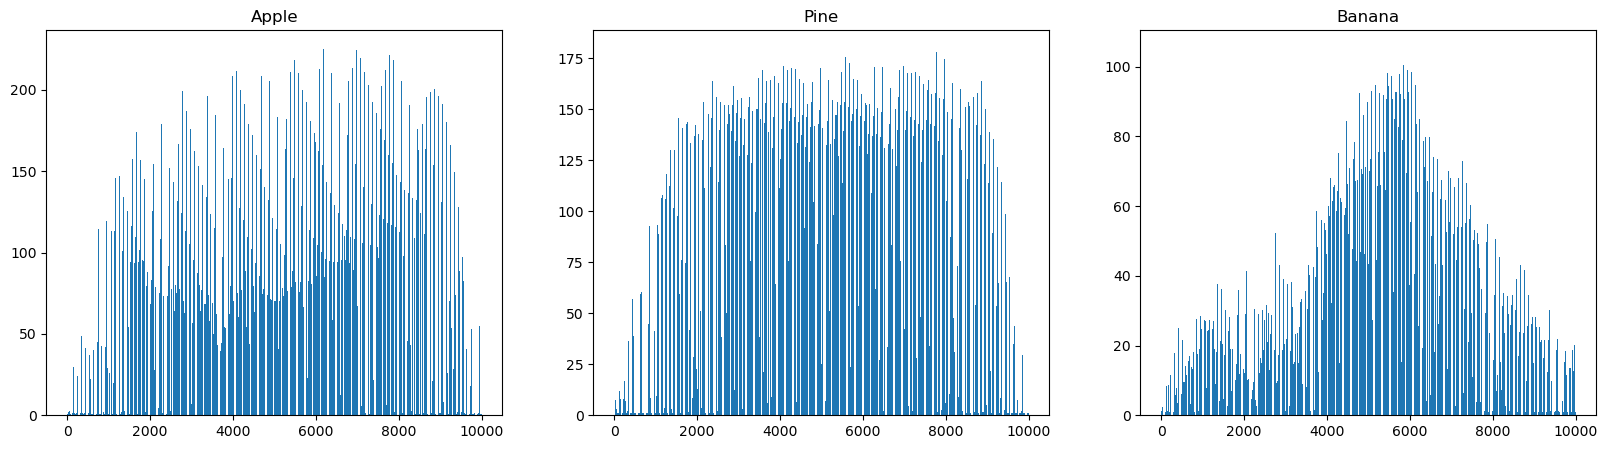

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pine, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
axs[0].set_title('Apple')
axs[1].set_title('Pine')
axs[2].set_title('Banana')
plt.show()

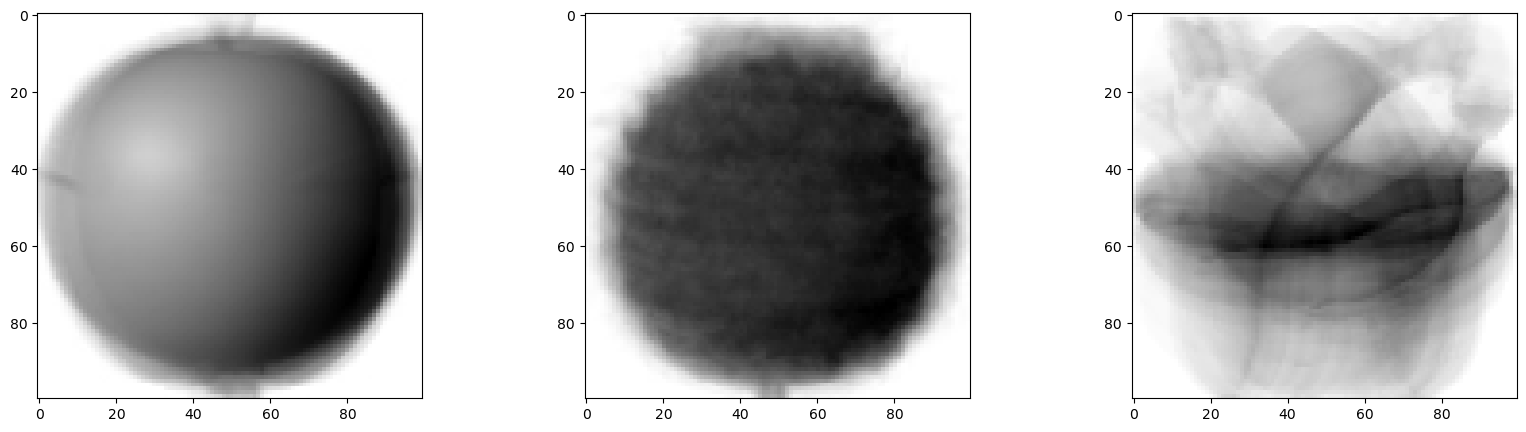

In [9]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pine_mean = np.mean(pine, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pine_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()

(300,)


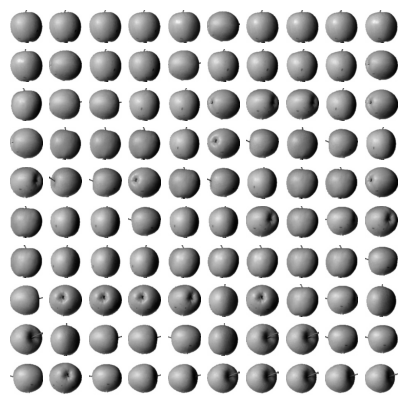

In [10]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(5,5))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

(300,)


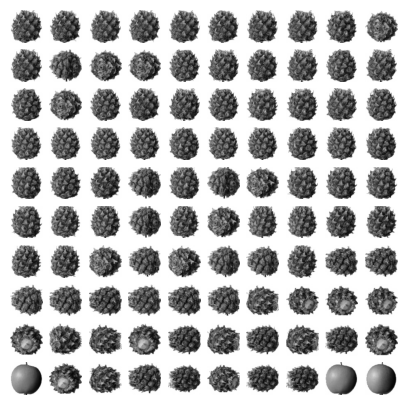

In [11]:
abs_diff = np.abs(fruits - pine_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

pine_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(5,5))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[pine_index[i*10+j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

(300,)


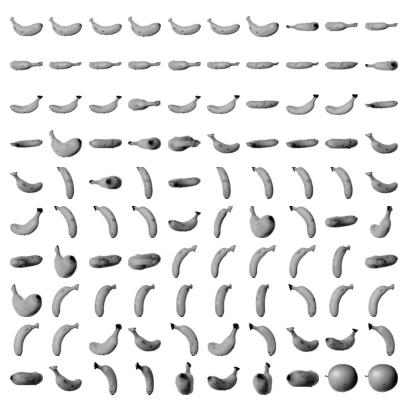

In [12]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))
print(abs_mean.shape)

banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(5,5))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10+j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()

# K-Means

1. 임의의 클러스터 중심(Centroid)을 정하고, 그 중심에 가까운 샘플을 몇 개씩 선택하여 클러스터로 묶음<br>
2. 클러스터 안에 있는 샘플들의 평균으로 Centroid를 조정함<br>
3. 조정된 Centroid로 새로 클러스터를 묶음<br>
4. 클러스터의 샘플 구성 변화가 없으면 종료


In [13]:
fruits_2d = fruits.reshape(-1, 100*100)

In [14]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [15]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


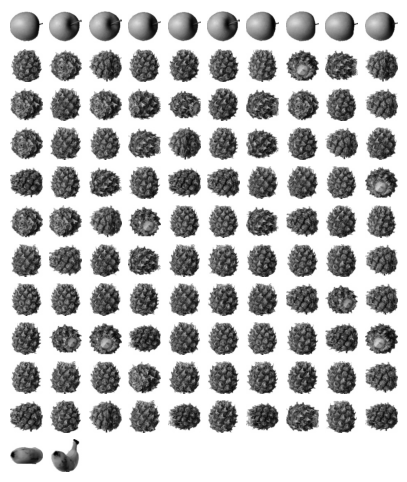

In [16]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10

    fig, axs = plt.subplots(rows, cols, 
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

draw_fruits(fruits[km.labels_ == 0], 0.5)

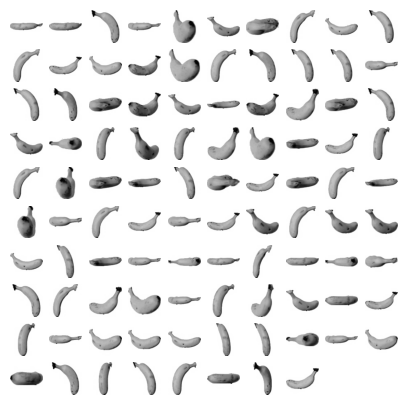

In [17]:
draw_fruits(fruits[km.labels_ == 1], 0.5)

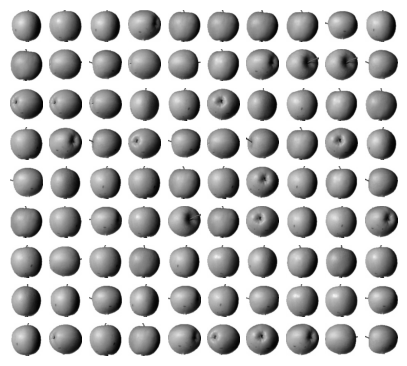

In [18]:
draw_fruits(fruits[km.labels_ == 2], 0.5)

centroid

(3, 10000)


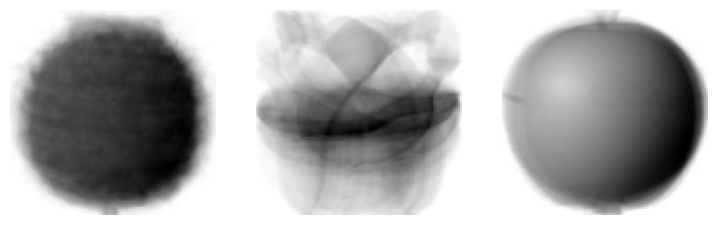

In [19]:
print(km.cluster_centers_.shape)
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [20]:
print(km.transform(fruits_2d[100:101]))
print(km.predict(fruits_2d[100:101]))
print(km.n_iter_)

[[3400.24197319 8837.37750892 5279.33763699]]
[0]
4


## Elbow
최적의 K값 찾기<br>
Inertia : 클러스터에 속한 샘플 사이의 거리 제곱<br>
K값(클러스터 수)이 늘어나면 Inertia는 보통 줄어듬<br>
이를 통해 최적의 클러스터 개수를 찾는 방법<br>
K값에 대한 Inertia값을 보고, Inertia의 그래프가 꺾이는 지점을 찾음<br>

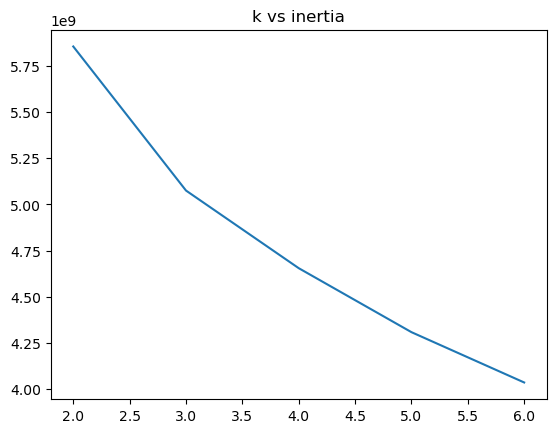

In [21]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.title('k vs inertia')
plt.show()

# Dimensionality Reduction
데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도학습 모델의 성능을 향상시킬 수 있음<br><br>
### PCA (Principal Component Analysis)
데이터에 있는 분산이 큰 방향을 찾는 것<br>
샘플 데이터를 주성분에 투영하여 차원을 줄임<br>
그 다음 해당 주성분에 수직이고 분산이 가장 큰 다음 주성분을 찾고 이어나감<br>
n_components는 주성분의 수<br>
주성분의 수가 많을수록 해당 데이터의 특성(즉 해당 샘플의 원래의 정보)를 더 많이 담고 있으므로, inverse할 때 원본과 비슷해짐, but 데이터의 크기는 주성분이 적을수록 더 압축됨<br>
첫번째 주성분의 Explained variance가 가장 큼 당연!<br>
<br>
<br>
### !!!!즉, PCA 모델의 Component에는 주성분에 대한 정보 저장
### 각 샘플을 PCA 모델로 Transform하면 실제 샘플의 특성값(여기서는 픽셀값)이 아니라, 각 주성분에 대한 값이 저장됨
### 약간 주파수 도메인 같기도..

In [22]:
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)
print(pca.components_.shape)

(50, 10000)


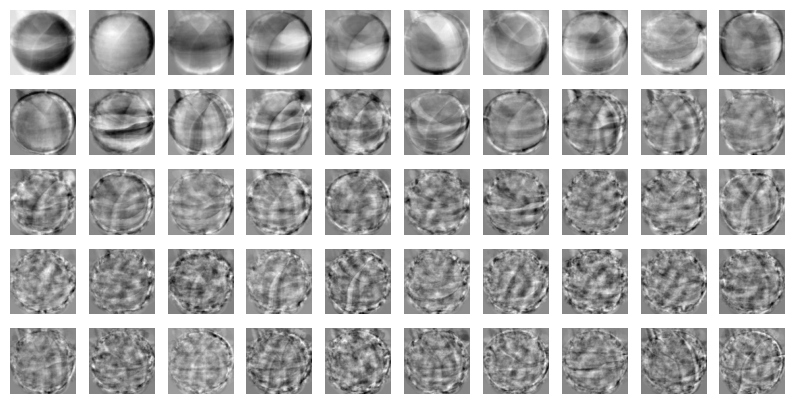

In [23]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [24]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)
print(fruits_pca[0])

(300, 50)
[ 2.77841779e+03  1.57187381e+03 -1.33533774e+03 -1.54134677e+03
 -3.01773970e+02  3.08058076e+02 -3.19610241e+02 -5.21959623e+02
 -1.42037302e+02 -1.40085159e+03 -9.30923867e+02 -2.23883429e+02
 -1.12422227e+02 -1.19356581e+01 -8.42509944e+01 -4.45460991e+02
  5.28697835e+02 -2.68888067e+02 -1.53283988e+02  1.92617322e+02
  3.28336006e+01 -4.70447729e+02 -1.80359672e+02 -1.29466266e+02
 -2.25385515e+02 -6.84726470e+01 -5.10521551e+01 -1.12480456e+01
 -7.64067647e+01  1.79180324e+02  3.91371094e+01 -1.69287282e+02
  4.57543595e+01  5.42520191e+01  9.61152700e+01 -2.38829240e+00
  6.19866125e+00  1.25082430e+02 -6.19583231e+01 -5.95674567e+01
 -1.12481993e+02  1.24150792e+02  2.88034149e+01  5.48717138e+01
 -4.59548616e+01 -9.78880150e+00  1.87678980e+01  1.20242036e+02
 -8.99518282e+01 -2.48065957e+01]


(300, 10000)


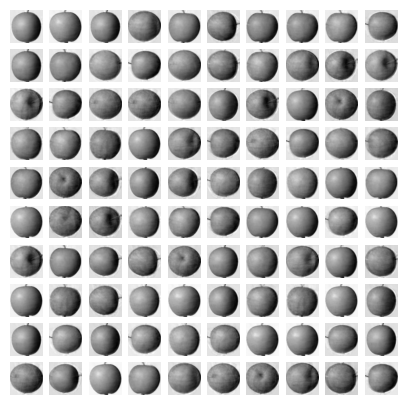

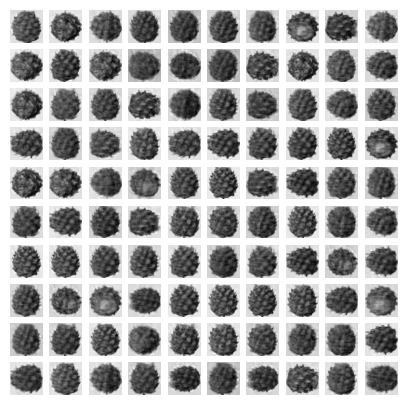

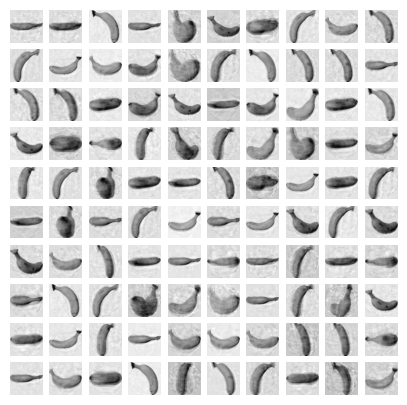

In [25]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_recon = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_recon[start:start+100], 0.5)
    print('\n')

In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [27]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.14919791221618653


In [28]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.006412220001220703


In [29]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)
print(pca.n_components_)

2


In [30]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [31]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.013916301727294921


/opt/anaconda3/envs/self/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/self/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

In [32]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([110,  99,  91]))


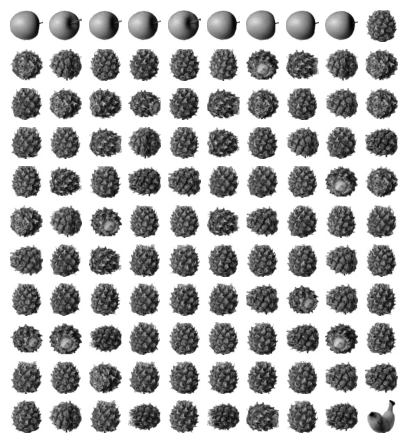

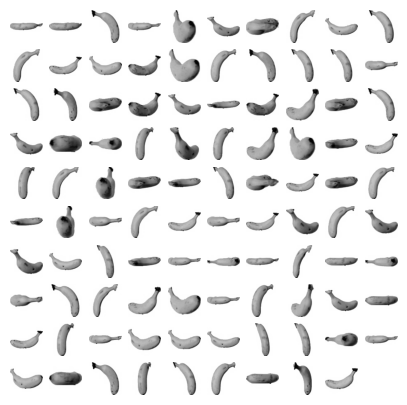

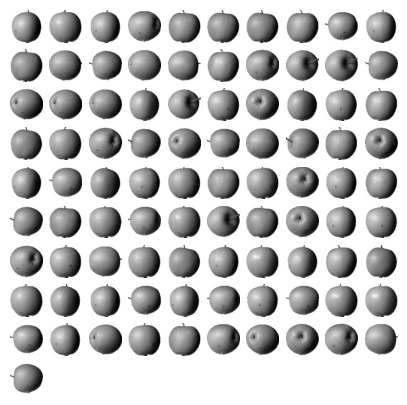

In [33]:
for l in range(0, 3):
    draw_fruits(fruits[km.labels_ == l], 0.5)

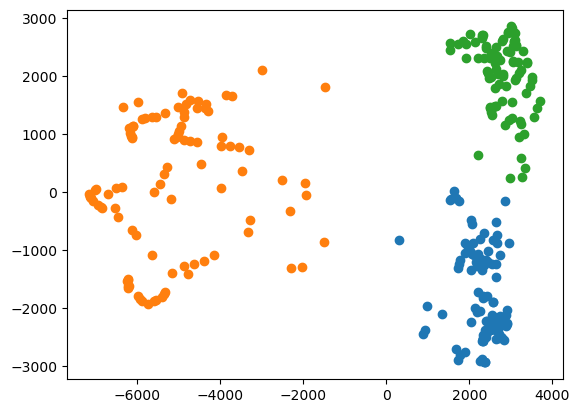

In [34]:
for label in range(0, 3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:, 0], data[:, 1])
plt.show()